<a href="https://colab.research.google.com/github/unnimaya-vu/CognoRise/blob/main/titanic_survivalpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC** **SURVIVAL** **PREDICTION**

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

Read the data

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking for missing values

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

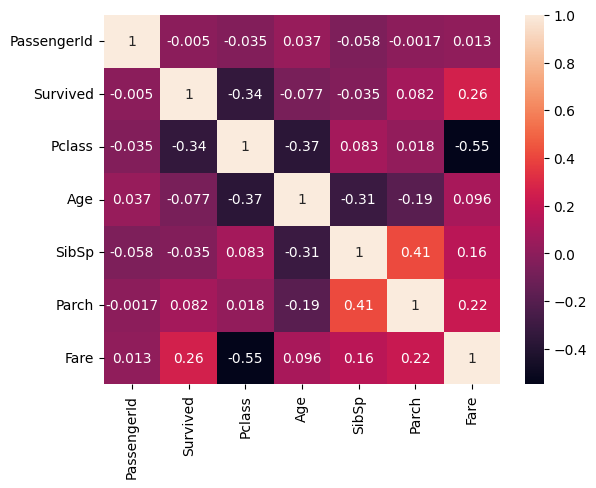

In [ ]:
sns.heatmap(df.corr(),annot=True)

Handling missing values

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
mean_age=df['Age'].mean()
df['Age'].fillna(mean_age,inplace=True)
mode_emb=df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_emb,inplace=True)

In [ ]:
df.drop(['Cabin','PassengerId','Name','Ticket'],inplace=True,axis=1)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(891, 8)

Data Visualization

<Axes: xlabel='Age', ylabel='Count'>

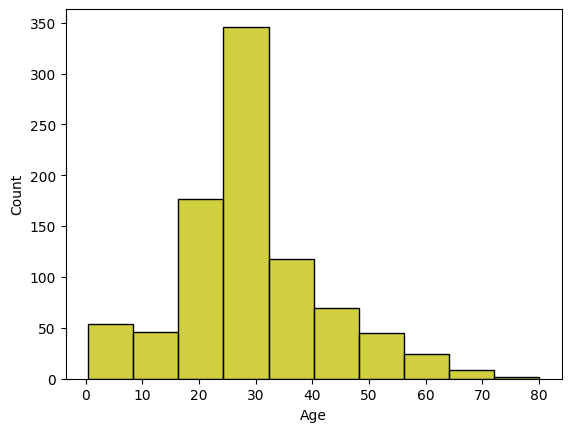

In [ ]:
sns.histplot(df['Age'],bins=10,color='y')

<Axes: xlabel='Survived', ylabel='count'>

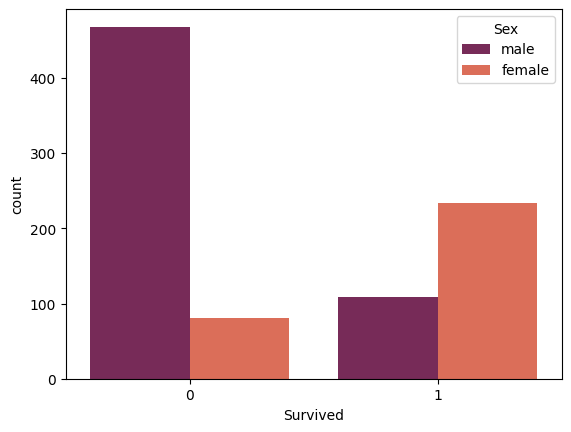

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='rocket')

In [ ]:
class_count=df['Pclass'].value_counts()

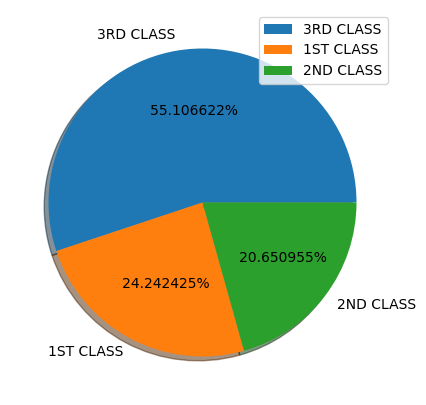

In [ ]:
labels=['3RD CLASS','1ST CLASS','2ND CLASS']
plt.figure(figsize=(10,5))
plt.pie(class_count,labels=labels,autopct='%12f%%',shadow=True)
plt.legend(loc='upper right')

<Axes: xlabel='Survived', ylabel='count'>

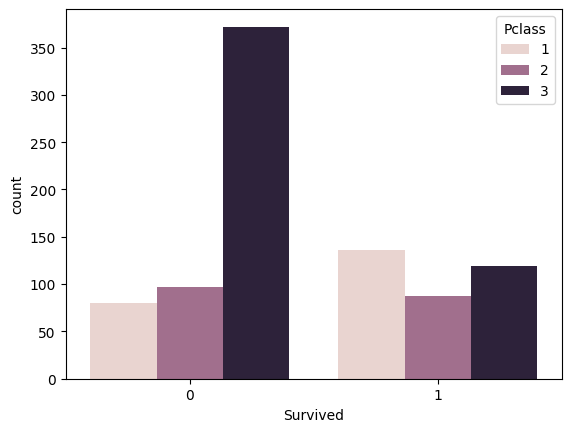

In [ ]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

<Axes: >

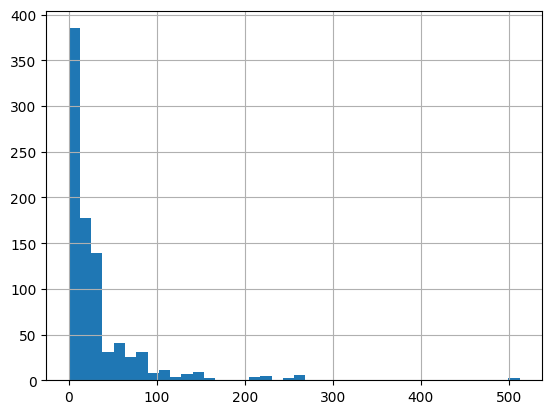

In [ ]:
df['Fare'].hist(bins=40)

<Axes: ylabel='Fare'>

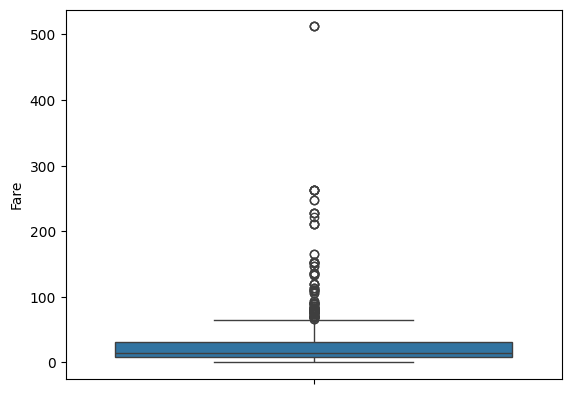

In [ ]:
sns.boxplot(y='Fare',data=df)

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Sex']=lab.fit_transform(df['Sex'])
df['Embarked']=lab.fit_transform(df['Embarked'])

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [ ]:
x=df.drop(['Survived'],axis=1)
x.ndim

2

In [ ]:
y=df['Survived']

Train and test data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,1,4.000000,0,2,81.8583,2
650,3,1,29.699118,0,0,7.8958,2
172,3,0,1.000000,1,1,11.1333,2
450,2,1,36.000000,1,2,27.7500,2
314,2,1,43.000000,1,1,26.2500,2
...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,2
270,1,1,29.699118,0,0,31.0000,2
860,3,1,41.000000,2,0,14.1083,2
435,1,0,14.000000,1,2,120.0000,2


Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-1.63788124,  0.72077194, -1.94694658, ...,  1.99885349,
         0.98099823,  0.57000481],
       [ 0.80326712,  0.72077194,  0.02724309, ..., -0.47932706,
        -0.46963364,  0.57000481],
       [ 0.80326712, -1.38740139, -2.17740465, ...,  0.75976322,
        -0.40613632,  0.57000481],
       ...,
       [ 0.80326712,  0.72077194,  0.8953696 , ..., -0.47932706,
        -0.34778742,  0.57000481],
       [-1.63788124, -1.38740139, -1.17875302, ...,  1.99885349,
         1.72907416,  0.57000481],
       [-1.63788124,  0.72077194, -0.64101752, ...,  0.75976322,
         0.8913508 ,  0.57000481]])

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42,n_jobs=-1)

Hyper parametric tuning

In [ ]:
params={'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100,200],
      'n_estimators':[10,25,30,50,100,200]}
from sklearn.model_selection import GridSearchCV
gd=GridSearchCV(model,params,cv=4,n_jobs=-1,scoring='accuracy')
gd.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
rf=gd.best_estimator_
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
model1=RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
score1=accuracy_score(y_test,y_pred1)
score1

0.8059701492537313

KNN,Naive Bayes,SVM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=GaussianNB()
s_model=SVC()
lst_model=[k_model,n_model,s_model]

In [ ]:
acc=[]
for i in lst_model:
  print('Model is',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  score=accuracy_score(y_test,y_pred)
  print('Accuracy score is',score)
  print('*'*50)
  acc.extend([score])
print(acc)





Model is KNeighborsClassifier(n_neighbors=7)
Accuracy score is 0.7761194029850746
**************************************************
Model is GaussianNB()
Accuracy score is 0.7985074626865671
**************************************************
Model is SVC()
Accuracy score is 0.8208955223880597
**************************************************
[0.7761194029850746, 0.7985074626865671, 0.8208955223880597]


In [ ]:
models=['KNN','Naive Bayes','SVM','RandomForestClassifier']
acc.append(score1)
acc


[0.7761194029850746,
 0.7985074626865671,
 0.8208955223880597,
 0.8059701492537313]

Accuracy plot of various models

<Axes: >

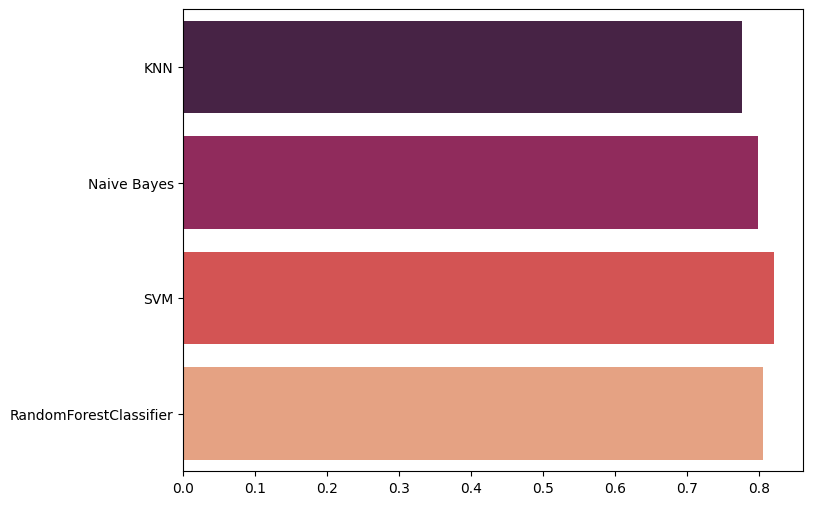

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=acc,y=models,palette='rocket')
